In [10]:
import pandas as pd
import numpy as np
import pytz
import pycountry
from timezonefinder import TimezoneFinder
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件
df = pd.read_csv('users_combined_info_500.csv')

# 用空白占位符填充country字段的缺失值
df['country'].fillna('unknown', inplace=True)
df['location'].fillna('unknown', inplace=True)
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce', utc=True)

# 检查无效日期
invalid_dates = df['event_time'].isna().sum()
if invalid_dates > 0:
    print(f"There are {invalid_dates} invalid date entries which have been coerced to NaT (Not a Time).")

# 初始化 TimezoneFinder
tf = TimezoneFinder()

# 定义一个函数来获取国家对应的时区
def get_timezone(country_name):
    try:
        if country_name == 'unknown':
            return 'UTC'
        if country_name == 'Russia': 
            country_name = 'Russian Federation'
        country_code = pycountry.countries.lookup(country_name).alpha_2
        timezones = pytz.country_timezones[country_code]
        return timezones[0]  # 返回第一个时区
    except (LookupError, KeyError):
        print(f"Invalid country name: {country_name}")
        return 'UTC'

# 根据国家转换时区
def convert_timezone(row):
    if pd.notna(row['event_time']):
        country = row['country']
        timezone = get_timezone(country)
        try:
            local_time = row['event_time'].tz_convert(timezone)
            return local_time
        except Exception as e:
            print(f"Error converting timezone for {country} at event_time {row['event_time']}: {e}")
            return pd.NaT
    else:
        return pd.NaT

# 应用时间转换
df['local_event_time'] = df.apply(convert_timezone, axis=1)

# 打印出所有转换失败的行数据
#failed_conversions = df[df['local_event_time'].isna()]
#print("All Failed Conversions:")
#print(failed_conversions[['event_time', 'country', 'local_event_time']].head(50))

# 打印成功转换的部分行数据以验证转换正确性
#print("Successful Conversions Sample:")
#print(successful_conversions[['event_time', 'country', 'local_event_time']].head(20))

# 确保 local_event_time 列转换成功
df['local_event_time'] = pd.to_datetime(df['local_event_time'], errors='coerce')

# 检查 local_event_time 列中 NaT 值的数量
#nat_count = df['local_event_time'].isna().sum()
#print(f"There are {nat_count} NaT values in the local_event_time column after conversion.")

# 人口统计分析
## 国家和地区分布
country_distribution = df['country'].value_counts()
print("\n国家和地区分布：")
print(country_distribution)

# 过滤掉仅包含国家名称的行数据
def is_city_location(row):
    return row['location'].strip().lower() not in [row['country'].strip().lower(), 'uk', 'united kingdom', 'us', 'united states']

df_cities = df[df.apply(is_city_location, axis=1)]

## 城市级别分布
city_distribution = df_cities['location'].value_counts().head(40)
print("\n城市级别分布：")
print(city_distribution)

# 时区分布
df['timezone'] = df['event_time'].dt.tz
timezone_distribution = df['timezone'].value_counts()
print("\n时区分布：")
print(timezone_distribution)

# 每小时的用户提交次数分布
df['hour'] = df['local_event_time'].dt.hour.fillna(-1).astype(int)
hourly_activity = df[df['hour'] >= 0].groupby('hour').size()
print("\nHourly User Activity:")
print(hourly_activity)

# 协作行为分析
## 提交频率
submission_frequency = df['name'].value_counts()
print("\n提交频率：")
print(submission_frequency)


/tmp/ipykernel_26973/3023827697.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('unknown', inplace=True)
/tmp/ipykernel_26973/3023827697.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try


国家和地区分布：
country
United States           305788
Germany                 182659
unknown                  88151
China                    73011
United Kingdom           71606
France                   59570
Canada                   58600
Netherlands              52367
Czechia                  48122
Japan                    46553
Switzerland              38093
Australia                35746
Italy                    30671
Poland                   20002
New Zealand              18444
Spain                    14939
Austria                  11758
Sweden                    9851
Finland                   8815
Denmark                   7412
Bulgaria                  7357
Hungary                   7080
Belgium                   6628
Norway                    6004
India                     5689
United Arab Emirates      5264
Singapore                 5205
Brazil                    5022
Hong Kong                 4767
Malaysia                  4538
Pakistan                  4462
Indonesia            

/tmp/ipykernel_26973/2790993340.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_distribution.index, y=country_distribution.values, palette='viridis')


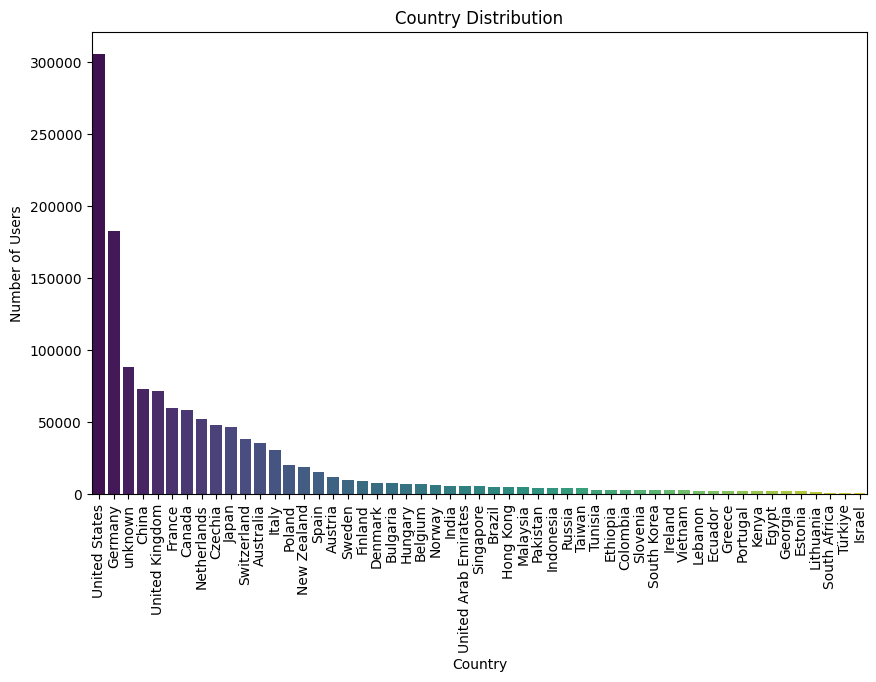

/tmp/ipykernel_26973/2790993340.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='plasma')
/root/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyp

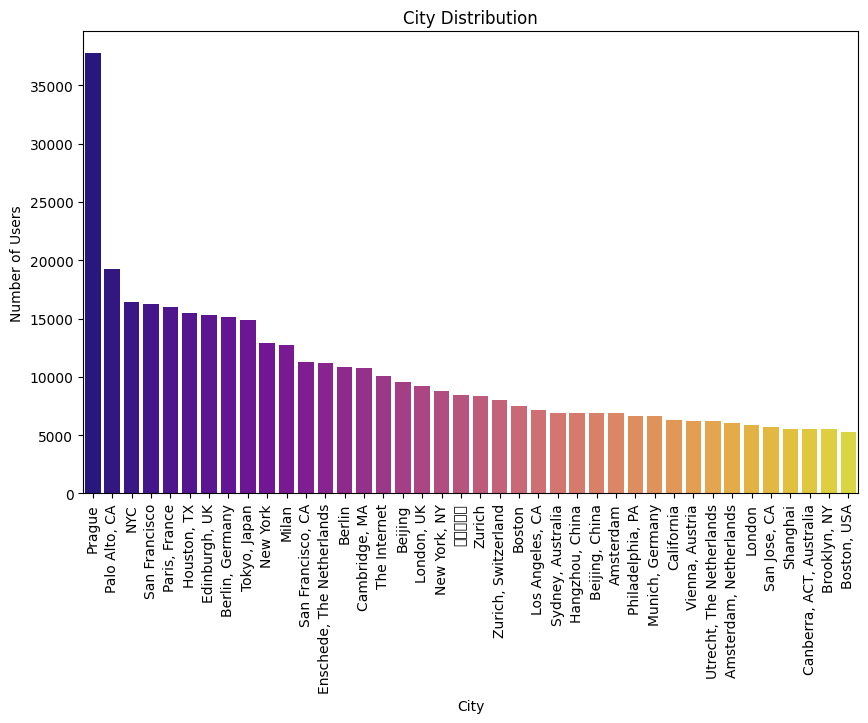

/tmp/ipykernel_26973/2790993340.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_activity.index, y=hourly_activity.values, palette='coolwarm')


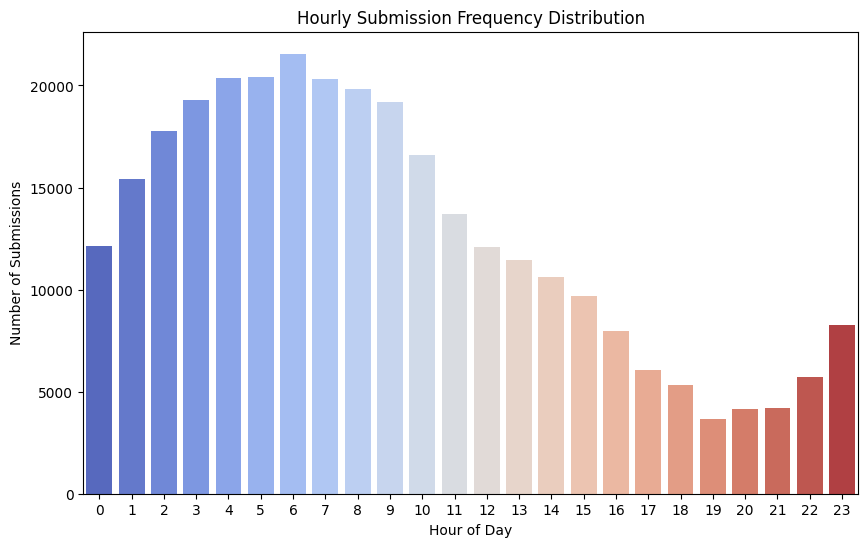

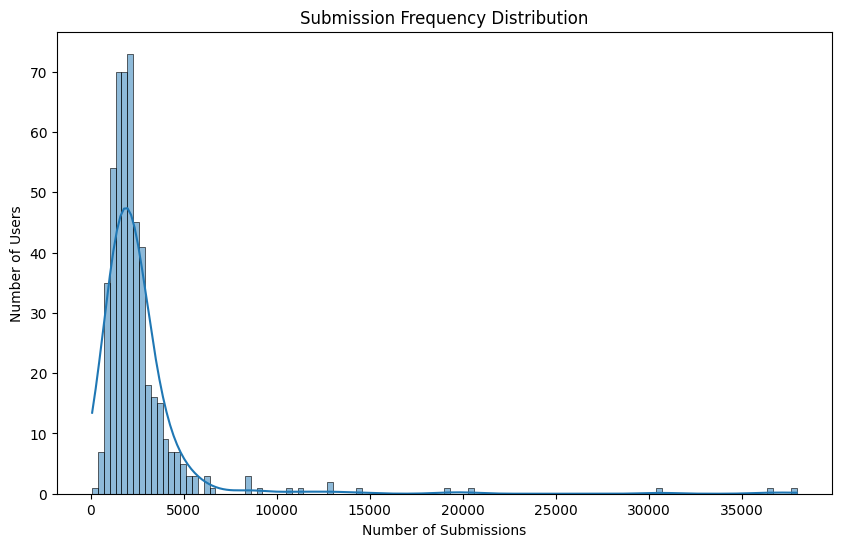

In [11]:
# 数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

## 国家和地区分布的条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=country_distribution.index, y=country_distribution.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.show()

## 城市级别分布的条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='plasma')
plt.xticks(rotation=90)
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.show()

## 每小时的用户提交次数分布的条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_activity.index, y=hourly_activity.values, palette='coolwarm')
plt.title('Hourly Submission Frequency Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Submissions')
plt.show()

## 提交频率的分布图
plt.figure(figsize=(10, 6))
sns.histplot(submission_frequency, kde=True)
plt.title('Submission Frequency Distribution')
plt.xlabel('Number of Submissions')
plt.ylabel('Number of Users')
plt.show()



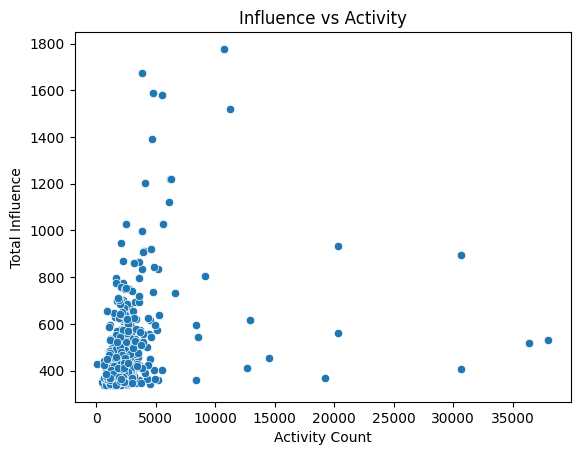

Influence and Activity Count Correlation: 0.2711753721894405


/tmp/ipykernel_26973/3984125289.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_influence.index, y=location_influence.values, palette='magma')
/root/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Gly

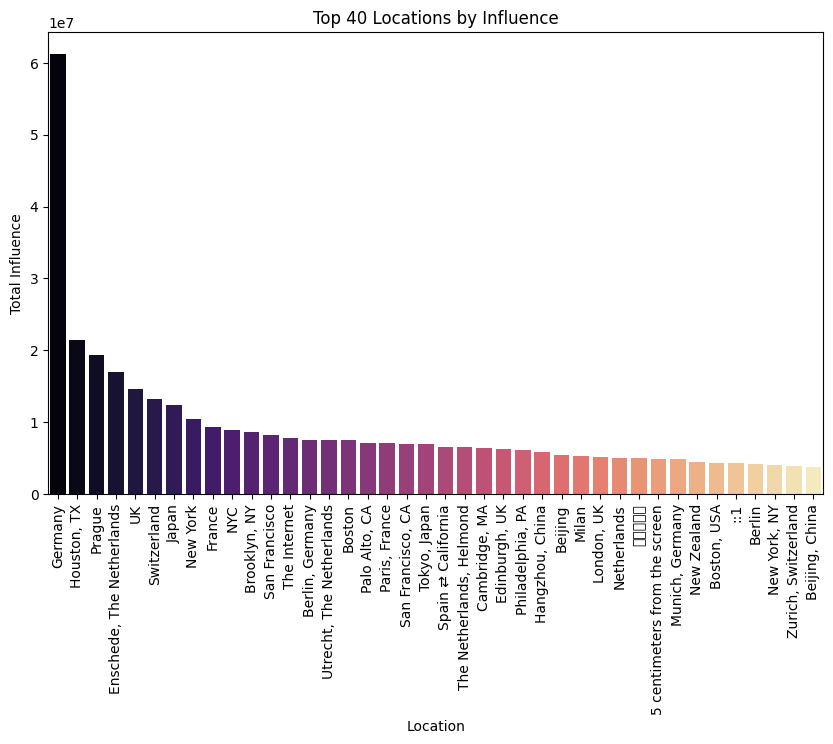

In [17]:
# 影响力与活跃度的关系
df_activity_influence = df.groupby('user_id')['event_time'].count().reset_index()
df_activity_influence.columns = ['user_id', 'activity_count']
df_activity_influence = df_activity_influence.merge(df[['user_id', 'total_influence']].drop_duplicates(), on='user_id')
sns.scatterplot(x='activity_count', y='total_influence', data=df_activity_influence)
plt.title('Influence vs Activity')
plt.xlabel('Activity Count')
plt.ylabel('Total Influence')
plt.show()
correlation = df_activity_influence['activity_count'].corr(df_activity_influence['total_influence']) 
print(f"Influence and Activity Count Correlation: {correlation}")


## 按地点的影响力分布的条形图
location_influence = df.groupby('location')['total_influence'].sum().sort_values(ascending=False).head(40)
plt.figure(figsize=(10, 6))
sns.barplot(x=location_influence.index, y=location_influence.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Top 40 Locations by Influence')
plt.xlabel('Location')
plt.ylabel('Total Influence')
plt.show()
